In [1]:
import collections
import pathlib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Markdown

import tskit
import tszip


import sc2ts.utils


In [2]:
ts_long_path = "../data/upgma-mds-1000-md-30-mm-3-2022-06-30-recinfo2-gisaid-il.ts.tsz"
ts_wide_path = "../data/upgma-full-md-30-mm-3-2021-06-30-recinfo2-gisaid-il.ts.tsz"

In [3]:
ts_long = tszip.decompress(ts_long_path)
ts_long

In [4]:
ts_wide = tszip.decompress(ts_wide_path)
ts_wide

In [5]:
ti_long = sc2ts.utils.TreeInfo(ts_long)
ti_long

Classifying mutations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1062072/1062072 [00:10<00:00, 103424.87it/s]


,value
property,
latest_sample,2022-06-30
max_submission_delay,29 days
samples,657239
nodes,783231
mc_nodes,37749
pr_nodes,34358
re_nodes,2078
recombinants,2078
mutations,1062072


In [6]:
df_long = ti_long.recombinants_summary()

In [7]:
df_long.descendants.describe()

count      2078.000000
mean        322.405197
std        6806.510618
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max      178405.000000
Name: descendants, dtype: float64

In [61]:
df_long.sort_values("descendants").tail(5)

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,child_mutations,child_reversions,causal_strain,causal_pango,causal_date
1441,576244,Added 2022-01-01,Unknown (R),2,7,14869,2021-12-18,-18979 days,----,2,2,0,6,5,India/UP-NBRI-7-1-22-56-CWS-1149/2022,B.1.1,2022-01-01
1328,555388,Added 2021-12-14,Unknown (R),3,6,127227,2021-12-12,-18973 days,----,3,3,1,18,7,Denmark/DCGC-281594/2021,BA.2.9,2021-12-14
1297,544949,Added 2021-12-06,Unknown (R),2,1,127230,2021-12-05,-18966 days,----,0,0,0,19,5,USA/NJ-GBW-EWR000001/2021,BA.3,2021-12-06
396,235293,Added 2021-03-28,Unknown (R),2,4,177649,2021-03-12,-18698 days,----,0,0,0,2,1,India/ILSGS00961/2021,B.1.617.2,2021-03-28
380,229998,Added 2021-03-24,Unknown (R),3,3,178405,2021-03-08,-18694 days,----,2,2,0,6,0,Germany/HH-RKI-I-061284/2021,B.1.617.2,2021-03-24


In [9]:
df_long_outliers = df_long[df_long.descendants > 100_000]
df_long_outliers

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,child_mutations,child_reversions,causal_strain,causal_pango,causal_date
380,229998,Added 2021-03-24,Unknown (R),3,3,178405,2021-03-08,-18694 days,----,2,2,0,6,0,Germany/HH-RKI-I-061284/2021,B.1.617.2,2021-03-24
396,235293,Added 2021-03-28,Unknown (R),2,4,177649,2021-03-12,-18698 days,----,0,0,0,2,1,India/ILSGS00961/2021,B.1.617.2,2021-03-28
1297,544949,Added 2021-12-06,Unknown (R),2,1,127230,2021-12-05,-18966 days,----,0,0,0,19,5,USA/NJ-GBW-EWR000001/2021,BA.3,2021-12-06
1328,555388,Added 2021-12-14,Unknown (R),3,6,127227,2021-12-12,-18973 days,----,3,3,1,18,7,Denmark/DCGC-281594/2021,BA.2.9,2021-12-14


In [10]:
recombinants = ti_long.combine_recombinant_info()

In [11]:
dfr_long = pd.DataFrame([rec.data_summary() for rec in recombinants])
dfr_long

,causal_strain,causal_date,causal_lineage,node,max_descendant_samples,num_parents,total_cost,is_hmm_mutation_consistent,is_arg_hmm_path_identical,is_arg_hmm_path_length_consistent,is_path_length_consistent,is_parent_lineage_consistent
0,USA/WA-UW-2142/2020,2020-03-25,B.1.320,6799,1,2,4,True,True,True,True,True
1,Germany/NW-RKI-I-204616/2021,2021-08-02,AY.122,387432,1,2,8,True,True,True,True,True
2,USA/KS-KSU-2695/2022,2022-05-12,BA.2.12.1,725357,2,2,27,True,True,True,True,True
3,USA/KY-CDC-ASC210274643/2021,2021-08-05,AY.118,391096,1,2,5,True,True,True,True,True
4,CzechRepublic/6SVAN20/2021,2021-10-13,AY.43,474996,1,2,14,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2073,Germany/SN-RKI-I-180100/2021,2021-05-25,B.1.1.7,306586,1,2,10,True,True,True,True,True
2074,Germany/SN-RKI-I-085059/2021,2021-04-04,B.1.1.7,244125,1,2,6,True,True,True,True,True
2075,Germany/BY-RKI-I-168309/2021,2021-05-07,B.1.1.7,284227,1,2,4,True,True,True,True,False
2076,Germany/SN-RKI-I-062950/2021,2021-03-26,B.1.1.7,233031,1,2,5,True,True,True,True,True


# Total cost distribution

What is the overall distribution of the HMM total cost, and how to our target samples compare with this?

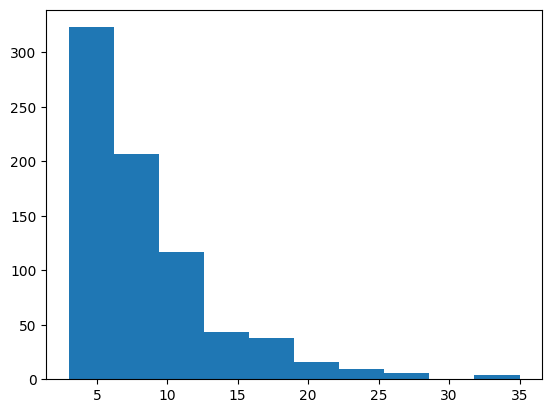

In [12]:
plt.hist(dfr_long.total_cost[dfr_long.max_descendant_samples > 1]);

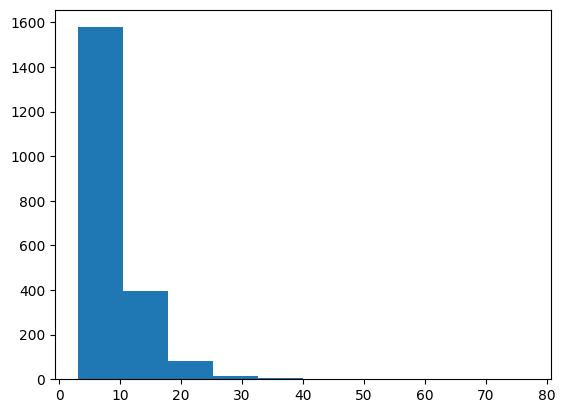

In [52]:
plt.hist(dfr_long.total_cost[dfr_long.max_descendant_samples >= 1]);

In [53]:
np.mean(dfr_long.total_cost[dfr_long.max_descendant_samples >= 1])

8.392685274302213

In [54]:
np.median(dfr_long.total_cost[dfr_long.max_descendant_samples >= 1])

7.0

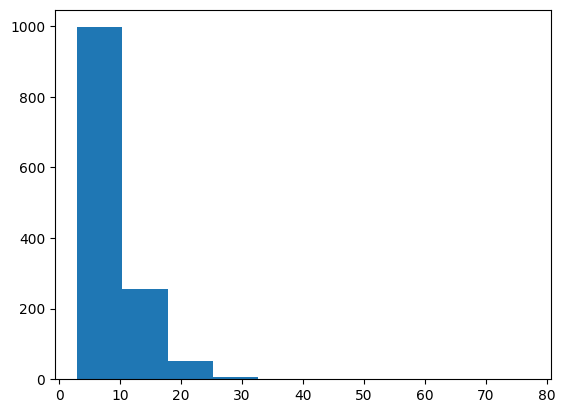

In [13]:
plt.hist(dfr_long.total_cost[dfr_long.max_descendant_samples == 1]);

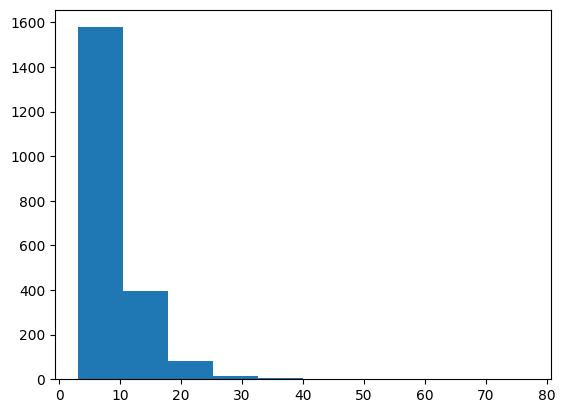

In [14]:
plt.hist([rec.total_cost for rec in recombinants]);

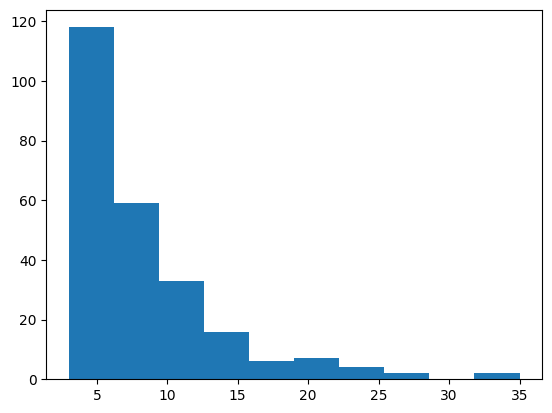

In [15]:
plt.hist(dfr_long.total_cost[(dfr_long.max_descendant_samples > 5) & (dfr_long.max_descendant_samples < 1000)]);

(array([769., 108.,  28.,  14.,   5.,   1.,   1.,   0.,   2.,   2.]),
 array([ 0. ,  3.8,  7.6, 11.4, 15.2, 19. , 22.8, 26.6, 30.4, 34.2, 38. ]),
 <BarContainer object of 10 artists>)

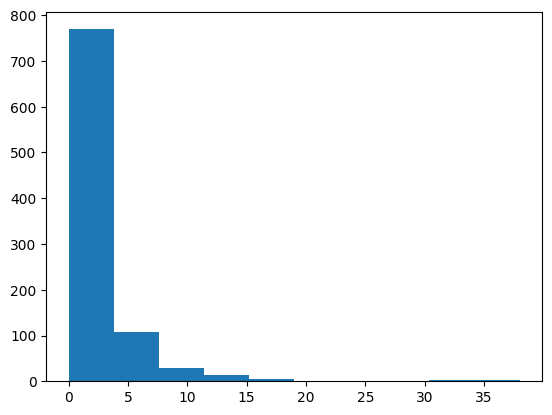

In [57]:
first_samples = [ti_long.pango_lineage_samples[k][0] for k in ti_long.pango_lineage_samples.keys()]
plt.hist(ti_long.nodes_num_mutations[first_samples])

In [59]:
np.mean(ti_long.nodes_num_mutations[first_samples])

2.4612903225806453

In [16]:
dfr_long[dfr_long.max_descendant_samples > 100_000]

,causal_strain,causal_date,causal_lineage,node,max_descendant_samples,num_parents,total_cost,is_hmm_mutation_consistent,is_arg_hmm_path_identical,is_arg_hmm_path_length_consistent,is_path_length_consistent,is_parent_lineage_consistent
182,Germany/HH-RKI-I-061284/2021,2021-03-24,B.1.617.2,229998,178405,3,17,True,True,True,True,True
1031,India/ILSGS00961/2021,2021-03-28,B.1.617.2,235293,177649,2,25,False,True,True,True,False
1236,Denmark/DCGC-281594/2021,2021-12-14,BA.2.9,555388,127227,3,32,True,True,True,True,True
1541,USA/NJ-GBW-EWR000001/2021,2021-12-06,BA.3,544949,127230,2,25,False,True,True,True,False


In [17]:
df_long_recombs = {rec.node: rec for rec in recombinants if rec.node in set(df_long_outliers.node)}

In [18]:
df_long_recombs[229998].data_summary()

{'causal_strain': 'Germany/HH-RKI-I-061284/2021',
 'causal_date': '2021-03-24',
 'causal_lineage': 'B.1.617.2',
 'node': 229998,
 'max_descendant_samples': 178405,
 'num_parents': 3,
 'total_cost': 17,
 'is_hmm_mutation_consistent': True,
 'is_arg_hmm_path_identical': True,
 'is_arg_hmm_path_length_consistent': True,
 'is_path_length_consistent': True,
 'is_parent_lineage_consistent': True}

# 229998 Germany/HH-RKI-I-061284/2021

This seems to be something happening around the start of the Delta wave. It looks like we may have a something odd happening in the alignment for this sample, in that we have no Ns. This sample is the third earliest sample marked as Delta.

In [19]:
ti_long.nodes_metadata[ti_long.strain_map["Germany/HH-RKI-I-061284/2021"]]

{'GISAID_lineage': 'B.1.617.2',
 'Imputed_GISAID_lineage': 'B.1.617.2',
 'Imputed_Nextclade_pango': 'B.1.617.2',
 'Nextclade_pango': 'B.1.617.2',
 'clade': '21A (Delta)',
 'country': 'Germany',
 'date': '2021-03-24',
 'date_submitted': '2021-04-13',
 'gisaid_epi_isl': 'EPI_ISL_1566762',
 'host': 'Human',
 'qc.frameShifts.status': 'good',
 'qc.missingData.status': 'good',
 'qc.mixedSites.status': 'good',
 'qc.stopCodons.status': 'good',
 'sc2ts_qc': {'num_masked_sites': 125,
  'original_base_composition': {'-': 101,
   'A': 8901,
   'C': 5471,
   'G': 5849,
   'T': 9581},
  'original_md5': '3160796426df6c3c8eeb211512f2dc71'},
 'strain': 'Germany/HH-RKI-I-061284/2021',
 'totalSubstitutions': 34.0}

In [20]:
ti_long.pango_lineage_samples["B.1.617.2"][:10]

[204945,
 222162,
 229997,
 231547,
 231548,
 234936,
 235196,
 235292,
 239972,
 239973]

In [63]:
ti_long.pango_lineage_samples["B.1.617.2"].index(ti_long.strain_map["Germany/HH-RKI-I-061284/2021"])

2

In [21]:
ti_long.nodes_date[ti_long.pango_lineage_samples["B.1.617.2"][:10]]

array(['2021-03-04', '2021-03-17', '2021-03-24', '2021-03-25',
       '2021-03-25', '2021-03-28', '2021-03-28', '2021-03-28',
       '2021-04-01', '2021-04-01'], dtype='datetime64[D]')

In [22]:
display(*ti_long.node_report(229998))

# Report for 229998

[{'Imputed_GISAID_lineage': 'Unknown (R)',
  'Imputed_Nextclade_pango': 'Unknown (R)',
  'breakpoint_intervals': [[6287, 6540], [20321, 21256]],
  'date_added': '2021-03-24',
  'match_info': [{'breakpoints': [0, 6287, 20321, 29904],
    'direction': 'backward',
    'mutations': ['9203G>A',
     '9678T>C',
     '11005C>A',
     '20396A>G',
     '21792A>C',
     '24745T>C',
     '25523G>T',
     '25784G>T',
     '27752C>T',
     '28271->A',
     '29771A>G'],
    'num_mismatches': 3.0,
    'parents': [204945, 167942, 204945],
    'strain': 'Germany/HH-RKI-I-061284/2021'},
   {'breakpoints': [0, 6539, 21255, 29904],
    'direction': 'forward',
    'mutations': ['9203G>A',
     '9678T>C',
     '11005C>A',
     '20396A>G',
     '21792A>C',
     '24745T>C',
     '25523G>T',
     '25784G>T',
     '27752C>T',
     '28271->A',
     '29771A>G'],
    'num_mismatches': 3.0,
    'parents': [204945, 167942, 204945],
    'strain': 'Germany/HH-RKI-I-061284/2021'}]}]

### Node data 

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,child_mutations,child_reversions,role,branch_length
0,229998,Added 2021-03-24,Unknown (R),3,3,178405,2021-03-08,-18694 days,----,2,2,0,6,0,Child,0.000000
1,204945,India/WB-1931500912396/2021,B.1.617.2,1,6,194685,2021-03-04,27 days,0000,1,0,0,12,3,Parent,4.000000
2,167942,Push 1 reversions,B.1.177,1,8,762,2020-12-14,-18610 days,----,3,0,0,11,2,Parent,84.181356
3,204945,India/WB-1931500912396/2021,B.1.617.2,1,6,194685,2021-03-04,27 days,0000,1,0,0,12,3,Parent,4.000000


### Edges

id,left,right,parent,child,metadata
0,0,6539,204945,229998,
1,6539,21255,167942,229998,
2,21255,29904,204945,229998,


### Copying pattern

pos,204,210,445,1191,1267,4929,5184,6286,6539,9891,11418,12946,14262,15451,16466,17496,20262,20320,21255,21614,21618,22227,22917,22995,23604,24745,25469,25587,25836,26767,26801,27638,27878,27925,27944,28271,28461,28932,29402,29645,29742
ref,G,G,T,C,C,A,C,C,C,C,T,T,C,G,C,A,A,C,G,C,C,C,T,C,C,C,C,C,C,T,C,T,T,C,C,A,A,C,G,G,G
P0,G,T,T,T,T,A,T,C,T,T,C,C,T,A,T,A,G,T,G,C,G,C,G,A,G,T,T,C,C,C,C,C,T,C,C,-,G,C,T,G,T
C,G,T,T,T,T,A,T,C,C,C,T,T,C,G,C,G,A,C,G,C,G,C,G,A,G,C,T,C,C,C,C,C,T,C,C,A,G,C,T,G,T
P1,T,G,C,C,C,G,C,T,C,C,T,T,C,G,C,G,A,C,C,T,C,T,T,C,C,C,C,T,T,T,G,T,C,T,T,A,A,T,G,T,G
mut,,,,,,,,,,,,,,,,,,,,,,,,,,T>C,,,,,,,,,,->A,,,,,


## Left path to root

### Closest recombinant: 229998

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,branch_length
0,229998,Added 2021-03-24,Unknown (R),3,3,178405,2021-03-08,-18694 days,----,2,2,0,4.000000
1,204945,India/WB-1931500912396/2021,B.1.617.2,1,6,194685,2021-03-04,27 days,0000,1,0,0,5.332031
2,294002,Push 1 reversions,B.1.617.2,1,2,194686,2021-02-27,-18685 days,----,2,0,0,37.324219
3,274163,Push 3 reversions,B.1.617.2,1,5,194690,2021-01-21,-18648 days,----,20,0,0,298.593750
4,205995,Overlap 1 mut 2 sibs,B.1,1,3,194691,2020-03-28,-18349 days,----,1,0,0,36.250000
5,5868,Added 2020-03-24,B.1,1,22,465557,2020-02-21,-18313 days,----,1,0,0,0.500000
6,179,Italy/LOM-ASST-CDG1/2020,B.1,1,512,651891,2020-02-20,10 days,0000,1,0,0,23.000000
7,87,Germany/BY-ChVir-929/2020,B.1,1,13,651949,2020-01-28,3 days,0000,1,0,0,8.250000
8,5174,Overlap 1 mut 2 sibs,B,1,13,651969,2020-01-20,-18281 days,----,1,0,0,8.250000
9,1876,Overlap 1 mut 2 sibs,B,1,7,651983,2020-01-12,-18273 days,----,1,0,0,16.500000


## Right path to root

### Closest recombinant: 229998

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,branch_length
0,229998,Added 2021-03-24,Unknown (R),3,3,178405,2021-03-08,-18694 days,----,2,2,0,4.000000
1,204945,India/WB-1931500912396/2021,B.1.617.2,1,6,194685,2021-03-04,27 days,0000,1,0,0,5.332031
2,294002,Push 1 reversions,B.1.617.2,1,2,194686,2021-02-27,-18685 days,----,2,0,0,37.324219
3,274163,Push 3 reversions,B.1.617.2,1,5,194690,2021-01-21,-18648 days,----,20,0,0,298.593750
4,205995,Overlap 1 mut 2 sibs,B.1,1,3,194691,2020-03-28,-18349 days,----,1,0,0,36.250000
5,5868,Added 2020-03-24,B.1,1,22,465557,2020-02-21,-18313 days,----,1,0,0,0.500000
6,179,Italy/LOM-ASST-CDG1/2020,B.1,1,512,651891,2020-02-20,10 days,0000,1,0,0,23.000000
7,87,Germany/BY-ChVir-929/2020,B.1,1,13,651949,2020-01-28,3 days,0000,1,0,0,8.250000
8,5174,Overlap 1 mut 2 sibs,B,1,13,651969,2020-01-20,-18281 days,----,1,0,0,8.250000
9,1876,Overlap 1 mut 2 sibs,B,1,7,651983,2020-01-12,-18273 days,----,1,0,0,16.500000


### Children 
Node 229998 has 3 children. Showing top-10 by descendant count

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,child_mutations,child_reversions,new_muts,same_site_muts,branch_length
0,235293,Added 2021-03-28,Unknown (R),2,4,177649,2021-03-12,-18698 days,----,0,0,0,2,1,0,0,4.0
1,240637,Push 3 reversions,B.1.617.2,1,8,757,2021-03-22,-18708 days,----,6,0,0,18,2,6,0,14.0
2,357852,Added 2021-07-07,Unknown (R),3,2,3,2021-06-02,-18780 days,----,0,0,0,8,4,0,0,85.8


## Mutation path

,site,node,descendants,inheritors,inherited_state,derived_state,is_reversion,is_immediate_reversion,is_transition,is_transversion,is_insertion,is_deletion,parent,num_parents,time,id,metadata
18,28271,229998,177999,469,-,A,True,False,False,False,True,False,954043,1,479.000000,954308,{}
13,24745,229998,178022,177961,T,C,True,False,True,False,False,False,766307,1,479.000000,766312,{}
0,210,274163,16958,16907,G,T,False,False,False,True,False,False,-1,0,525.656250,8421,{}
20,28461,274163,194463,191796,A,G,False,False,True,False,False,False,-1,0,525.656250,970361,{}
19,28271,274163,194465,15348,A,-,False,False,False,False,False,True,-1,0,525.656250,954043,{}
17,27638,274163,194469,192986,T,C,False,False,True,False,False,False,-1,0,525.656250,913201,{}
16,26767,274163,194475,194120,T,C,False,False,True,False,False,False,-1,0,525.656250,868888,{}
15,25469,274163,194470,194344,C,T,False,False,True,False,False,False,-1,0,525.656250,797581,{}
14,24745,274163,194294,728,C,T,False,False,True,False,False,False,-1,0,525.656250,766307,{}
12,23604,274163,194293,194105,C,G,False,False,False,True,False,False,-1,0,525.656250,733343,{}


# 235293 India/ILSGS00961/2021

This node is an immediate child of the node investigated in the last section

In [23]:
ti_long.nodes_metadata[ti_long.strain_map["India/ILSGS00961/2021"]]

{'GISAID_lineage': 'AY.101',
 'Imputed_GISAID_lineage': 'AY.101',
 'Imputed_Nextclade_pango': 'B.1.617.2',
 'Nextclade_pango': 'B.1.617.2',
 'clade': '21J (Delta)',
 'country': 'India',
 'date': '2021-03-28',
 'date_submitted': '2021-04-21',
 'gisaid_epi_isl': 'EPI_ISL_1663534',
 'host': 'Human',
 'qc.frameShifts.status': 'good',
 'qc.missingData.status': 'good',
 'qc.mixedSites.status': 'good',
 'qc.stopCodons.status': 'good',
 'sc2ts_qc': {'num_masked_sites': 60,
  'original_base_composition': {'-': 54,
   'A': 8937,
   'C': 5463,
   'G': 5853,
   'T': 9596},
  'original_md5': '416c6bcd9c3296f3a6f17ae9f40458dd'},
 'strain': 'India/ILSGS00961/2021',
 'totalSubstitutions': 40.0}

In [62]:
ti_long.strain_map["India/ILSGS00961/2021"]

235292

In [64]:
ti_long.pango_lineage_samples["B.1.617.2"].index(ti_long.strain_map["India/ILSGS00961/2021"])

7

In [24]:
display(*ti_long.node_report(235293))

# Report for 235293

[{'Imputed_GISAID_lineage': 'Unknown (R)',
  'Imputed_Nextclade_pango': 'Unknown (R)',
  'breakpoint_intervals': [[17497, 21619]],
  'date_added': '2021-03-28',
  'match_info': [{'breakpoints': [0, 12947, 29904],
    'direction': 'backward',
    'mutations': ['210G>T',
     '925C>T',
     '4181G>T',
     '6402C>T',
     '7124C>T',
     '8986C>T',
     '9053G>T',
     '9559C>T',
     '11201A>G',
     '11332A>G',
     '15240C>T',
     '18176T>C',
     '19220C>T',
     '19276G>T',
     '19280G>T',
     '19281T>A',
     '19283A>C',
     '20262G>A',
     '27739T>C',
     '27874C>T',
     '28007T>C',
     '28916G>T'],
    'num_mismatches': 3.0,
    'parents': [175600, 231549],
    'strain': 'India/ILSGS00961/2021'},
   {'breakpoints': [0, 21618, 29904],
    'direction': 'forward',
    'mutations': ['210G>T',
     '925C>T',
     '4181G>T',
     '6402C>T',
     '7124C>T',
     '8986C>T',
     '9053G>T',
     '10029C>T',
     '11201A>G',
     '11332A>G',
     '15240C>T',
     '15451G>A',
     '

### Node data 

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,child_mutations,child_reversions,role,branch_length
0,235293,Added 2021-03-28,Unknown (R),2,4,177649,2021-03-12,-18698 days,----,0,0,0,2,1,Child,0.0
1,21605,SouthAfrica/KRISP-0458/2020,B.1.1,1,1,177293,2020-07-02,21 days,0000,2,0,0,0,0,Parent,253.0
2,229998,Added 2021-03-24,Unknown (R),3,3,178405,2021-03-08,-18694 days,----,2,2,0,6,0,Parent,4.0


### Edges

id,left,right,parent,child,metadata
0,0,21618,21605,235293,
1,21618,29904,229998,235293,


### Copying pattern

pos,210,1191,1267,5184,9559,17496,21618,22917,22995,23380,23604,25469,25644,25711,25753,26767,27638,28461,29402,29711,29742
ref,G,C,C,C,C,A,C,T,C,C,C,C,G,T,G,T,T,A,G,G,G
P0,G,C,C,C,T,A,C,T,C,T,C,C,T,C,T,T,T,A,G,T,G
C,G,C,C,C,T,A,G,G,A,C,G,T,G,T,G,C,C,G,T,G,T
P1,T,T,T,T,C,G,G,G,A,C,G,T,G,T,G,C,C,G,T,G,T
mut,,,,,,,,,,,,,,,,,,,,,


## Left path to root

### Closest recombinant: 235293

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,branch_length
0,235293,Added 2021-03-28,Unknown (R),2,4,177649,2021-03-12,-18698 days,----,0,0,0,253.00
1,21605,SouthAfrica/KRISP-0458/2020,B.1.1,1,1,177293,2020-07-02,21 days,0000,2,0,0,12.00
2,21606,Added 2020-07-02,B.1.1,1,1,177293,2020-06-20,-18433 days,----,0,0,0,13.75
3,21656,Push 2 reversions,B.1.1,1,3,177297,2020-06-07,-18420 days,----,3,0,0,75.25
4,5184,Australia/VIC592/2020,B.1.1,1,4,177301,2020-03-23,25 days,0000,1,0,0,32.00
5,179,Italy/LOM-ASST-CDG1/2020,B.1,1,512,651891,2020-02-20,10 days,0000,1,0,0,23.00
6,87,Germany/BY-ChVir-929/2020,B.1,1,13,651949,2020-01-28,3 days,0000,1,0,0,8.25
7,5174,Overlap 1 mut 2 sibs,B,1,13,651969,2020-01-20,-18281 days,----,1,0,0,8.25
8,1876,Overlap 1 mut 2 sibs,B,1,7,651983,2020-01-12,-18273 days,----,1,0,0,16.50
9,1,,B,1,333,657239,2019-12-26,-18256 days,----,0,0,0,1.00


## Right path to root

### Closest recombinant: 235293

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,branch_length
0,235293,Added 2021-03-28,Unknown (R),2,4,177649,2021-03-12,-18698 days,----,0,0,0,4.000000
1,229998,Added 2021-03-24,Unknown (R),3,3,178405,2021-03-08,-18694 days,----,2,2,0,4.000000
2,204945,India/WB-1931500912396/2021,B.1.617.2,1,6,194685,2021-03-04,27 days,0000,1,0,0,5.332031
3,294002,Push 1 reversions,B.1.617.2,1,2,194686,2021-02-27,-18685 days,----,2,0,0,37.324219
4,274163,Push 3 reversions,B.1.617.2,1,5,194690,2021-01-21,-18648 days,----,20,0,0,298.593750
5,205995,Overlap 1 mut 2 sibs,B.1,1,3,194691,2020-03-28,-18349 days,----,1,0,0,36.250000
6,5868,Added 2020-03-24,B.1,1,22,465557,2020-02-21,-18313 days,----,1,0,0,0.500000
7,179,Italy/LOM-ASST-CDG1/2020,B.1,1,512,651891,2020-02-20,10 days,0000,1,0,0,23.000000
8,87,Germany/BY-ChVir-929/2020,B.1,1,13,651949,2020-01-28,3 days,0000,1,0,0,8.250000
9,5174,Overlap 1 mut 2 sibs,B,1,13,651969,2020-01-20,-18281 days,----,1,0,0,8.250000


### Children 
Node 235293 has 4 children. Showing top-10 by descendant count

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,child_mutations,child_reversions,new_muts,same_site_muts,branch_length
0,248215,Overlap 1 mut 2 sibs,Unknown,1,2,177638,2021-03-19,-18705 days,----,1,0,0,28,4,1,0,7.00
1,251176,Added 2021-04-10,Unknown (R),3,4,6,2021-04-04,-18721 days,----,0,0,0,8,2,0,0,22.92
2,317935,Added 2021-06-03,Unknown (R),2,2,5,2021-05-23,-18770 days,----,0,0,0,2,2,0,0,71.96
3,286728,Qatar/QA.QU_18.13.C11/2021,B.1.617,1,3,4,2021-05-09,26 days,1000,1,0,0,12,4,1,0,58.00


## Mutation path

,site,node,descendants,inheritors,inherited_state,derived_state,is_reversion,is_immediate_reversion,is_transition,is_transversion,is_insertion,is_deletion,parent,num_parents,time,id,metadata
9,24745,229998,178022,177961,T,C,True,False,True,False,False,False,766307,1,479.00000,766312,{}
14,28271,229998,177999,469,-,A,True,False,False,False,True,False,954043,1,479.00000,954308,{}
16,28461,274163,194463,191796,A,G,False,False,True,False,False,False,-1,0,525.65625,970361,{}
15,28271,274163,194465,15348,A,-,False,False,False,False,False,True,-1,0,525.65625,954043,{}
13,27638,274163,194469,192986,T,C,False,False,True,False,False,False,-1,0,525.65625,913201,{}
12,26767,274163,194475,194120,T,C,False,False,True,False,False,False,-1,0,525.65625,868888,{}
11,25469,274163,194470,194344,C,T,False,False,True,False,False,False,-1,0,525.65625,797581,{}
10,24745,274163,194294,728,C,T,False,False,True,False,False,False,-1,0,525.65625,766307,{}
17,29402,274163,194462,193781,G,T,False,False,False,True,False,False,-1,0,525.65625,1024746,{}
18,29742,274163,194460,193764,G,T,False,False,False,True,False,False,-1,0,525.65625,1053490,{}


In [ ]:
sc2ts.utils.plot_subgraph(

# 555388 Denmark/DCGC-281594/2021

This is the first BA.2.9 sample.

The copying pattern is similar to the first outlier, in that we snip a chunk out of one sample. 



In [25]:
ti_long.nodes_metadata[ti_long.strain_map["Denmark/DCGC-281594/2021"]]

{'GISAID_lineage': 'BA.2.9',
 'Imputed_GISAID_lineage': 'BA.2.9',
 'Imputed_Nextclade_pango': 'BA.2.9',
 'Nextclade_pango': 'BA.2.9',
 'clade': '21L (Omicron)',
 'country': 'Denmark',
 'date': '2021-12-14',
 'date_submitted': '2021-12-23',
 'gisaid_epi_isl': 'EPI_ISL_8002589',
 'host': 'Human',
 'qc.frameShifts.status': 'good',
 'qc.missingData.status': 'good',
 'qc.mixedSites.status': 'good',
 'qc.stopCodons.status': 'good',
 'sc2ts_qc': {'num_masked_sites': 615,
  'original_base_composition': {'-': 148,
   'A': 8774,
   'C': 5373,
   'G': 5781,
   'N': 340,
   'T': 9487},
  'original_md5': '60b907bfd3b3a21dbdebe68f81116ec7'},
 'strain': 'Denmark/DCGC-281594/2021',
 'totalSubstitutions': 68.0}

In [26]:
df_long_recombs[555388].asdict()

{'causal_strain': 'Denmark/DCGC-281594/2021',
 'causal_date': '2021-12-14',
 'causal_lineage': 'BA.2.9',
 'hmm_runs': {'backward': {'breakpoints': [0, 22674, 26060, 29904],
   'parents': [544948, 551092, 544948],
   'parent_imputed_lineages': ['BA.3', 'BA.1.17', 'BA.3'],
   'mutations': ['832T>C',
    '2790C>T',
    '9344C>T',
    '9424A>G',
    '9866C>T',
    '10198C>T',
    '11124T>C',
    '11235T>C',
    '17410C>T',
    '19955C>T',
    '20055A>G',
    '21618C>T',
    '21846T>C',
    '22200T>G',
    '22688A>G',
    '22775G>A',
    '22786A>C',
    '22792C>T',
    '22898A>G',
    '23048A>G',
    '23202A>C',
    '24130A>C',
    '25624C>T',
    '27382G>C',
    '27383A>T',
    '27384T>C']},
  'forward': {'breakpoints': [0, 22674, 26060, 29904],
   'parents': [544948, 551092, 544948],
   'parent_imputed_lineages': ['BA.3', 'BA.1.17', 'BA.3'],
   'mutations': ['832T>C',
    '2790C>T',
    '9344C>T',
    '9424A>G',
    '9866C>T',
    '10198C>T',
    '11124T>C',
    '11235T>C',
    '17410C>T'

In [27]:
ti_long.pango_lineage_samples["BA.2.9"][:10]

[555387,
 560544,
 560545,
 561533,
 561534,
 562516,
 562517,
 565457,
 568786,
 568787]

In [51]:
ti_long.nodes_date[ti_long.pango_lineage_samples["BA.2.9"][:10]]

array(['2021-12-14', '2021-12-18', '2021-12-18', '2021-12-19',
       '2021-12-19', '2021-12-20', '2021-12-20', '2021-12-22',
       '2021-12-25', '2021-12-25'], dtype='datetime64[D]')

In [28]:
display(*ti_long.node_report(555388))

# Report for 555388

[{'Imputed_GISAID_lineage': 'Unknown (R)',
  'Imputed_Nextclade_pango': 'Unknown (R)',
  'breakpoint_intervals': [[22674, 22675], [26060, 26061]],
  'date_added': '2021-12-14',
  'match_info': [{'breakpoints': [0, 22674, 26060, 29904],
    'direction': 'backward',
    'mutations': ['832T>C',
     '2790C>T',
     '9344C>T',
     '9424A>G',
     '9866C>T',
     '10198C>T',
     '11124T>C',
     '11235T>C',
     '17410C>T',
     '19955C>T',
     '20055A>G',
     '21618C>T',
     '21846T>C',
     '22200T>G',
     '22688A>G',
     '22775G>A',
     '22786A>C',
     '22792C>T',
     '22898A>G',
     '23048A>G',
     '23202A>C',
     '24130A>C',
     '25624C>T',
     '27382G>C',
     '27383A>T',
     '27384T>C'],
    'num_mismatches': 3.0,
    'parents': [544948, 551092, 544948],
    'strain': 'Denmark/DCGC-281594/2021'},
   {'breakpoints': [0, 22674, 26060, 29904],
    'direction': 'forward',
    'mutations': ['832T>C',
     '2790C>T',
     '9344C>T',
     '9424A>G',
     '9866C>T',
     '101

### Node data 

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,child_mutations,child_reversions,role,branch_length
0,555388,Added 2021-12-14,Unknown (R),3,6,127227,2021-12-12,-18973 days,----,3,3,1,18,7,Child,0.0
1,544948,USA/NJ-GBW-EWR000001/2021,BA.3,1,2,127228,2021-12-06,16 days,1000,2,0,0,3,3,Parent,5.6
2,551092,Poland/PZH-GUM-4346/2021,BA.1.17,1,3,127230,2021-12-11,12 days,0000,1,1,0,8,7,Parent,0.6
3,544948,USA/NJ-GBW-EWR000001/2021,BA.3,1,2,127228,2021-12-06,16 days,1000,2,0,0,3,3,Parent,5.6


### Edges

id,left,right,parent,child,metadata
0,0,22674,544948,555388,
1,22674,26060,551092,555388,
2,26060,29904,544948,555388,


### Copying pattern

pos,670,832,2832,3241,4184,4321,5386,5924,8393,9534,10447,11124,11235,11537,12880,13195,15240,15714,22673,22674,22679,22686,22813,22882,22898,22992,22995,23013,23040,23048,23055,23063,23075,23202,24130,25000,25584,26059,26060,26530,26858,29510
ref,T,C,A,C,G,C,T,G,G,C,G,C,C,A,C,T,C,C,T,C,T,C,G,T,G,G,C,A,A,G,A,A,T,C,C,C,C,A,C,A,C,A
P0,G,T,A,C,A,T,T,G,G,T,A,T,T,A,T,T,C,T,T,C,T,C,G,T,G,G,C,A,A,G,A,A,T,C,C,C,C,G,T,A,T,C
C,G,C,A,C,A,T,T,G,G,T,A,C,C,A,T,T,C,T,T,T,C,T,T,G,A,A,A,C,G,A,G,T,C,A,A,T,T,A,T,A,T,C
P1,T,C,G,T,G,C,G,A,A,C,G,C,C,G,C,C,T,C,C,T,C,T,T,G,A,A,A,C,G,A,G,T,C,A,A,T,T,A,C,G,C,A
mut,,T>C,,,,,,,,,,T>C,T>C,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## Left path to root

### Closest recombinant: 555388

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,branch_length
0,555388,Added 2021-12-14,Unknown (R),3,6,127227,2021-12-12,-18973 days,----,3,3,1,5.6000
1,544948,USA/NJ-GBW-EWR000001/2021,BA.3,1,2,127228,2021-12-06,16 days,1000,2,0,0,0.2000
2,574542,Push 2 reversions,Unknown,1,3,127229,2021-12-06,-18967 days,----,1,0,0,0.1750
3,595533,Push 1 reversions,Unknown,1,3,127230,2021-12-06,-18967 days,----,19,5,0,1.2250
4,544949,Added 2021-12-06,Unknown (R),2,1,127230,2021-12-05,-18966 days,----,0,0,0,223.6000
5,519829,Overlap 1 mut 2 sibs,B.1.1,1,4,193271,2021-04-25,-18742 days,----,1,0,0,22.8000
6,240954,USA/CO-CDC-FG-019996/2021,B.1.1,1,1,193272,2021-04-02,19 days,0010,2,0,0,315.8125
7,150642,Push 1 reversions,B.1.1,1,16,193325,2020-05-22,-18404 days,----,1,0,0,89.6875
8,5867,Added 2020-03-24,B.1.1,1,1396,271968,2020-02-22,-18314 days,----,1,1,1,1.0000
9,5868,Added 2020-03-24,B.1,1,22,465557,2020-02-21,-18313 days,----,1,0,0,0.5000


## Right path to root

### Closest recombinant: 555388

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,branch_length
0,555388,Added 2021-12-14,Unknown (R),3,6,127227,2021-12-12,-18973 days,----,3,3,1,5.600000
1,544948,USA/NJ-GBW-EWR000001/2021,BA.3,1,2,127228,2021-12-06,16 days,1000,2,0,0,0.200000
2,574542,Push 2 reversions,Unknown,1,3,127229,2021-12-06,-18967 days,----,1,0,0,0.175000
3,595533,Push 1 reversions,Unknown,1,3,127230,2021-12-06,-18967 days,----,19,5,0,1.225000
4,544949,Added 2021-12-06,Unknown (R),2,1,127230,2021-12-05,-18966 days,----,0,0,0,0.400000
5,542109,Germany/NW-HHU-15245/2021,BA.1.18,1,2,127194,2021-12-04,7 days,1000,1,0,0,0.875000
6,550941,Push 1 reversions,BA.1,1,3,127204,2021-12-04,-18965 days,----,2,1,0,6.125000
7,533180,Germany/NW-HHU-14095/2021,BA.1,1,2,127205,2021-11-27,17 days,1000,3,2,0,5.500000
8,564390,Overlap 1 mut 2 sibs,BA.1,1,2,127206,2021-11-22,-18953 days,----,1,1,0,5.500000
9,519278,SouthAfrica/CERI-KRISP-K032201/2021,BA.1,1,8,127513,2021-11-16,9 days,0000,1,1,0,11.400000


### Children 
Node 555388 has 6 children. Showing top-10 by descendant count

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,child_mutations,child_reversions,new_muts,same_site_muts,branch_length
0,578988,Push 4 reversions,Unknown,1,8,127203,2021-12-14,-18975 days,----,15,0,0,15,4,15,0,1.406836
1,587710,Added 2022-01-11,Unknown (R),2,5,29,2022-01-02,-18994 days,----,2,2,2,11,1,2,2,20.800000
2,568564,Added 2021-12-25,Unknown (R),2,2,18,2021-12-23,-18984 days,----,0,0,0,6,1,0,0,11.000000
3,617458,Germany/SN-RKI-I-560128/2022,BA.1,1,0,1,2022-02-07,17 days,0000,1,0,0,0,0,1,0,57.400000
4,649942,Germany/NW-RKI-I-658857/2022,BA.1,1,0,1,2022-03-08,23 days,0000,0,0,0,0,0,0,0,86.400000
5,661803,Germany/SN-RKI-I-710460/2022,BA.1,1,0,1,2022-03-18,26 days,0000,0,0,0,0,0,0,0,96.400000


## Mutation path

,site,node,descendants,inheritors,inherited_state,derived_state,is_reversion,is_immediate_reversion,is_transition,is_transversion,is_insertion,is_deletion,parent,num_parents,time,id,metadata
2,832,555388,126789,126533,T,C,True,False,True,False,False,False,38552,1,200.400,38557,{}
15,11235,555388,126951,126918,T,C,True,False,True,False,False,False,375421,1,200.400,375422,{}
13,11124,555388,126951,126849,T,C,True,True,True,False,False,False,372416,1,200.400,372420,{}
49,24503,551092,127034,127008,T,C,True,False,True,False,False,False,762410,1,201.000,762419,{}
42,23664,565510,127029,126886,T,C,True,False,True,False,False,False,737667,1,202.875,737672,{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,1191,5868,288217,4062,C,T,False,False,True,False,False,False,-1,0,860.500,53094,{}
18,14408,179,651885,651284,C,T,False,False,True,False,False,False,-1,0,861.000,461751,{}
6,3037,87,651936,651116,C,T,False,False,True,False,False,False,-1,0,884.000,121305,{}
38,23403,5174,651952,651680,A,G,False,False,True,False,False,False,-1,0,892.250,724978,{'type': 'overlap'}


# 544949 USA/NJ-GBW-EWR000001/2021

This is the first BA.3 sample. Has medioce missing data status.

In [29]:
ti_long.nodes_metadata[ti_long.strain_map["USA/NJ-GBW-EWR000001/2021"]]

{'GISAID_lineage': 'BA.3',
 'Imputed_GISAID_lineage': 'BA.3',
 'Imputed_Nextclade_pango': 'BA.3',
 'Nextclade_pango': 'BA.3',
 'clade': '21M (Omicron)',
 'country': 'USA',
 'date': '2021-12-06',
 'date_submitted': '2021-12-22',
 'gisaid_epi_isl': 'EPI_ISL_7980710',
 'host': 'Human',
 'qc.frameShifts.status': 'good',
 'qc.missingData.status': 'mediocre',
 'qc.mixedSites.status': 'good',
 'qc.stopCodons.status': 'good',
 'sc2ts_qc': {'num_masked_sites': 2661,
  'original_base_composition': {'-': 175,
   'A': 8216,
   'C': 5065,
   'G': 5414,
   'N': 2257,
   'T': 8776},
  'original_md5': '7c3009005ecb0c7ce8b5d87af4a0d995'},
 'strain': 'USA/NJ-GBW-EWR000001/2021',
 'totalSubstitutions': 39.0}

In [30]:
ti_long.pango_lineage_samples["BA.3"][:10]

[544948,
 574277,
 587709,
 588784,
 590709,
 590913,
 593636,
 595035,
 598571,
 605461]

In [31]:
ti_long.nodes_date[ti_long.pango_lineage_samples["BA.3"][:10]]

array(['2021-12-06', '2021-12-30', '2022-01-11', '2022-01-12',
       '2022-01-14', '2022-01-14', '2022-01-17', '2022-01-18',
       '2022-01-21', '2022-01-27'], dtype='datetime64[D]')

In [32]:
df_long_recombs[544949].asdict()

{'causal_strain': 'USA/NJ-GBW-EWR000001/2021',
 'causal_date': '2021-12-06',
 'causal_lineage': 'BA.3',
 'hmm_runs': {'backward': {'breakpoints': [0, 15241, 29904],
   'parents': [120478, 541522],
   'parent_imputed_lineages': ['B.1.36', 'BA.1'],
   'mutations': ['670T>G',
    '832C>T',
    '4184G>A',
    '4321C>T',
    '9534C>T',
    '10029C>T',
    '10447G>A',
    '10449C>A',
    '11124C>T',
    '11235C>T',
    '15714C>T',
    '18585C>A',
    '23202A>C',
    '24130A>C',
    '24503T>C',
    '25000T>C',
    '25584T>C',
    '26059A>G',
    '26060C>T',
    '26530G>A',
    '26858C>T',
    '29510A>C']},
  'forward': {'breakpoints': [0, 23525, 29904],
   'parents': [519829, 542109],
   'parent_imputed_lineages': ['B.1.1', 'BA.1.18'],
   'mutations': ['670T>G',
    '832C>T',
    '4184G>A',
    '4321C>T',
    '9534C>T',
    '10447G>A',
    '10449C>A',
    '11124C>T',
    '11235C>T',
    '12880C>T',
    '15714C>T',
    '18163A>G',
    '22578G>A',
    '23063T>A',
    '24503T>C',
    '25000T>C',

In [33]:
display(*ti_long.node_report(544949))

# Report for 544949

[{'Imputed_GISAID_lineage': 'Unknown (R)',
  'Imputed_Nextclade_pango': 'Unknown (R)',
  'breakpoint_intervals': [[23203, 23526]],
  'date_added': '2021-12-06',
  'match_info': [{'breakpoints': [0, 15241, 29904],
    'direction': 'backward',
    'mutations': ['670T>G',
     '832C>T',
     '4184G>A',
     '4321C>T',
     '9534C>T',
     '10029C>T',
     '10447G>A',
     '10449C>A',
     '11124C>T',
     '11235C>T',
     '15714C>T',
     '18585C>A',
     '23202A>C',
     '24130A>C',
     '24503T>C',
     '25000T>C',
     '25584T>C',
     '26059A>G',
     '26060C>T',
     '26530G>A',
     '26858C>T',
     '29510A>C'],
    'num_mismatches': 3.0,
    'parents': [120478, 541522],
    'strain': 'USA/NJ-GBW-EWR000001/2021'},
   {'breakpoints': [0, 23525, 29904],
    'direction': 'forward',
    'mutations': ['670T>G',
     '832C>T',
     '4184G>A',
     '4321C>T',
     '9534C>T',
     '10447G>A',
     '10449C>A',
     '11124C>T',
     '11235C>T',
     '12880C>T',
     '15714C>T',
     '18163A>G

### Node data 

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,child_mutations,child_reversions,role,branch_length
0,544949,Added 2021-12-06,Unknown (R),2,1,127230,2021-12-05,-18966 days,----,0,0,0,19,5,Child,0.0
1,519829,Overlap 1 mut 2 sibs,B.1.1,1,4,193271,2021-04-25,-18742 days,----,1,0,0,7,0,Parent,223.6
2,542109,Germany/NW-HHU-15245/2021,BA.1.18,1,2,127194,2021-12-04,7 days,1000,1,0,0,1,0,Parent,0.4


### Edges

id,left,right,parent,child,metadata
0,0,23525,519829,544949,
1,23525,29904,542109,544949,


### Copying pattern

pos,2832,5386,5730,8393,10449,11537,13195,15240,17259,18163,22578,22673,22674,22679,22686,22813,22992,22995,23013,23040,23048,23055,23075,23202,23525,23599,23854,23948,24424,24469,24503,25000,26270,26530,26577,27807,28271,28311
ref,A,T,C,G,C,A,T,C,G,A,G,T,C,T,C,G,G,C,A,A,G,A,T,C,C,T,C,G,A,T,C,C,C,A,C,C,A,C
P0,A,T,C,G,C,A,T,C,G,A,G,T,C,T,C,G,G,C,A,A,G,A,T,C,C,T,C,G,A,T,C,C,C,A,C,C,A,C
C,A,T,C,G,C,A,T,C,G,A,G,T,C,T,C,G,G,C,A,A,G,A,T,C,T,G,A,T,T,A,T,T,T,G,G,T,T,T
P1,G,G,T,A,A,G,C,T,T,G,A,C,T,C,T,T,A,A,C,G,A,G,C,A,T,G,A,T,T,A,T,T,T,G,G,T,T,T
mut,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## Left path to root

### Closest recombinant: 544949

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,branch_length
0,544949,Added 2021-12-06,Unknown (R),2,1,127230,2021-12-05,-18966 days,----,0,0,0,223.6000
1,519829,Overlap 1 mut 2 sibs,B.1.1,1,4,193271,2021-04-25,-18742 days,----,1,0,0,22.8000
2,240954,USA/CO-CDC-FG-019996/2021,B.1.1,1,1,193272,2021-04-02,19 days,0010,2,0,0,315.8125
3,150642,Push 1 reversions,B.1.1,1,16,193325,2020-05-22,-18404 days,----,1,0,0,89.6875
4,5867,Added 2020-03-24,B.1.1,1,1396,271968,2020-02-22,-18314 days,----,1,1,1,1.0000
5,5868,Added 2020-03-24,B.1,1,22,465557,2020-02-21,-18313 days,----,1,0,0,0.5000
6,179,Italy/LOM-ASST-CDG1/2020,B.1,1,512,651891,2020-02-20,10 days,0000,1,0,0,23.0000
7,87,Germany/BY-ChVir-929/2020,B.1,1,13,651949,2020-01-28,3 days,0000,1,0,0,8.2500
8,5174,Overlap 1 mut 2 sibs,B,1,13,651969,2020-01-20,-18281 days,----,1,0,0,8.2500
9,1876,Overlap 1 mut 2 sibs,B,1,7,651983,2020-01-12,-18273 days,----,1,0,0,16.5000


## Right path to root

### Closest recombinant: 544949

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,branch_length
0,544949,Added 2021-12-06,Unknown (R),2,1,127230,2021-12-05,-18966 days,----,0,0,0,0.400000
1,542109,Germany/NW-HHU-15245/2021,BA.1.18,1,2,127194,2021-12-04,7 days,1000,1,0,0,0.875000
2,550941,Push 1 reversions,BA.1,1,3,127204,2021-12-04,-18965 days,----,2,1,0,6.125000
3,533180,Germany/NW-HHU-14095/2021,BA.1,1,2,127205,2021-11-27,17 days,1000,3,2,0,5.500000
4,564390,Overlap 1 mut 2 sibs,BA.1,1,2,127206,2021-11-22,-18953 days,----,1,1,0,5.500000
5,519278,SouthAfrica/CERI-KRISP-K032201/2021,BA.1,1,8,127513,2021-11-16,9 days,0000,1,1,0,11.400000
6,568898,Push 1 reversions,BA.1,1,14,127548,2021-11-05,-18936 days,----,2,2,0,79.800000
7,519279,Added 2021-11-16,BA.1,1,352,192578,2021-08-17,-18856 days,----,2,0,0,22.800000
8,581228,Overlap 1 mut 2 sibs,BA.1,1,2,192579,2021-07-25,-18833 days,----,1,0,0,22.800000
9,575715,Overlap 1 mut 2 sibs,BA.1,1,2,192580,2021-07-03,-18811 days,----,1,0,0,45.600000


### Children 
Node 544949 has 1 children. Showing top-10 by descendant count

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,child_mutations,child_reversions,new_muts,same_site_muts,branch_length
0,595533,Push 1 reversions,Unknown,1,3,127230,2021-12-06,-18967 days,----,19,0,0,3,2,19,0,1.225


## Mutation path

,site,node,descendants,inheritors,inherited_state,derived_state,is_reversion,is_immediate_reversion,is_transition,is_transversion,is_insertion,is_deletion,parent,num_parents,time,id,metadata
12,23854,550941,223,222,C,A,True,False,False,True,False,False,742769,2,208.875000,742782,{}
27,27259,533180,127124,13,C,A,True,False,False,True,False,False,887326,1,215.000000,887331,{}
16,24130,533180,224,223,A,C,True,False,False,True,False,False,752244,1,215.000000,752445,{}
22,25584,564390,41,40,T,C,True,False,True,False,False,False,809083,1,220.500000,809138,{'type': 'overlap'}
13,23854,519278,531,68,A,C,True,False,False,True,False,False,742696,1,226.000000,742769,{}
25,26530,519280,192025,63479,A,G,False,False,True,False,False,False,-1,0,408.400000,858775,{}
24,26270,526290,192204,191783,C,T,False,False,True,False,False,False,-1,0,411.250000,850332,{}
31,28311,543137,192201,191876,C,T,False,False,True,False,False,False,-1,0,413.743750,960875,{}
26,26577,568904,192214,188932,C,G,False,False,False,True,False,False,-1,0,415.925781,860670,{}
23,25584,568904,192453,192374,C,T,False,False,True,False,False,False,-1,0,415.925781,809083,{}


# Wide ARG outliers

In [34]:
ti_wide = sc2ts.utils.TreeInfo(ts_wide)

Classifying mutations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1213193/1213193 [00:12<00:00, 100381.34it/s]


In [35]:
df_wide = ti_wide.recombinants_summary()

In [36]:
df_wide.sort_values("descendants").tail()

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,child_mutations,child_reversions,causal_strain,causal_pango,causal_date
1316,600902,Added 2021-03-18,Unknown (R),2,100,1688,2021-03-17,-18703 days,----,0,0,0,204,5,Australia/NSW-R0167/2021,B.1.617.2,2021-03-18
1269,590229,Added 2021-03-16,Unknown (R),3,7,1702,2021-03-07,-18693 days,----,1,1,0,8,0,USA/NY-NYCPHL-003914/2021,B.1.617.2,2021-03-16
69,136731,Added 2020-12-16,Unknown (R),2,5,19220,2020-11-28,-18594 days,----,0,0,0,12,3,USA/NY-Wadsworth-290403-01/2020,B.1.526,2020-12-16
1317,601947,Added 2021-03-18,Unknown (R),2,5,129478,2021-03-03,-18689 days,----,15,0,0,5,5,England/CAMC-141DB08/2021,B.1.617.2,2021-03-18
954,496613,Added 2021-03-04,Unknown (R),2,2,157700,2021-01-23,-18650 days,----,0,0,0,13,0,India/WB-1931500912396/2021,B.1.617.2,2021-03-04


In [37]:
df_wide_outliers = df_wide[df_wide.descendants > 100_000]
df_wide_outliers

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,child_mutations,child_reversions,causal_strain,causal_pango,causal_date
954,496613,Added 2021-03-04,Unknown (R),2,2,157700,2021-01-23,-18650 days,----,0,0,0,13,0,India/WB-1931500912396/2021,B.1.617.2,2021-03-04
1317,601947,Added 2021-03-18,Unknown (R),2,5,129478,2021-03-03,-18689 days,----,15,0,0,5,5,England/CAMC-141DB08/2021,B.1.617.2,2021-03-18


# Status of long ARG outliers in the Wide ARG

In [38]:
df_long_outliers.causal_strain

380     Germany/HH-RKI-I-061284/2021
396            India/ILSGS00961/2021
1297       USA/NJ-GBW-EWR000001/2021
1328        Denmark/DCGC-281594/2021
Name: causal_strain, dtype: object

In [39]:
for strain in df_long_outliers.causal_strain.values:
    try:
        display(*ti_wide.node_report(strain=strain))
    except Exception as e:
        print("ERROR", e)

# Report for 657120

[{'GISAID_lineage': 'B.1.617.2',
  'Imputed_GISAID_lineage': 'B.1.617.2',
  'Imputed_Nextclade_pango': 'B.1.617.2',
  'Nextclade_pango': 'B.1.617.2',
  'clade': '21A (Delta)',
  'country': 'Germany',
  'date': '2021-03-24',
  'date_submitted': '2021-04-13',
  'gisaid_epi_isl': 'EPI_ISL_1566762',
  'host': 'Human',
  'qc.frameShifts.status': 'good',
  'qc.missingData.status': 'good',
  'qc.mixedSites.status': 'good',
  'qc.stopCodons.status': 'good',
  'sc2ts_qc': {'num_masked_sites': 125,
   'original_base_composition': {'-': 101,
    'A': 8901,
    'C': 5471,
    'G': 5849,
    'T': 9581},
   'original_md5': '3160796426df6c3c8eeb211512f2dc71'},
  'strain': 'Germany/HH-RKI-I-061284/2021',
  'totalSubstitutions': 34.0}]

### Node data 

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,child_mutations,child_reversions,role,branch_length
0,657120,Germany/HH-RKI-I-061284/2021,B.1.617.2,1,0,1,2021-03-24,20 days,0000,2,0,0,0,0,Child,0.0
1,826849,Overlap 1 mut 2 sibs,B.1.617.2,1,13,115,2021-03-23,-18709 days,----,1,1,0,33,3,Parent,1.9


### Edges

id,left,right,parent,child,metadata
0,0,29904,826849,657120,


### Copying pattern

pos,25523,25784
ref,G,G
P0,G,G
C,T,T
mut,G>T,G>T


## Left path to root

### Closest recombinant: 600902

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,branch_length
0,657120,Germany/HH-RKI-I-061284/2021,B.1.617.2,1,0,1,2021-03-24,20 days,0000,2,0,0,1.90000
1,826849,Overlap 1 mut 2 sibs,B.1.617.2,1,13,115,2021-03-23,-18709 days,----,1,1,0,1.90000
2,777666,Overlap 1 mut 2 sibs,B.1.617.2,1,58,294,2021-03-21,-18707 days,----,1,0,0,3.80000
3,600902,Added 2021-03-18,Unknown (R),2,100,1688,2021-03-17,-18703 days,----,0,0,0,10.00000
4,590229,Added 2021-03-16,Unknown (R),3,7,1702,2021-03-07,-18693 days,----,1,1,0,2.40000
5,496612,India/WB-1931500912396/2021,B.1.617.2,1,10,9967,2021-03-04,27 days,0000,3,0,0,0.63125
6,1005026,Push 3 reversions,B.1.617.2,1,4,9970,2021-03-04,-18690 days,----,4,0,0,4.41875
7,591284,Push 7 reversions,B.1.617.2,1,8,157699,2021-02-27,-18685 days,----,13,0,0,35.35000
8,496613,Added 2021-03-04,Unknown (R),2,2,157700,2021-01-23,-18650 days,----,0,0,0,337.10000
9,5868,Added 2020-03-24,B.1,1,24,328234,2020-02-21,-18313 days,----,1,0,0,0.50000


## Right path to root

### Closest recombinant: 600902

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,branch_length
0,657120,Germany/HH-RKI-I-061284/2021,B.1.617.2,1,0,1,2021-03-24,20 days,0000,2,0,0,1.900000
1,826849,Overlap 1 mut 2 sibs,B.1.617.2,1,13,115,2021-03-23,-18709 days,----,1,1,0,1.900000
2,777666,Overlap 1 mut 2 sibs,B.1.617.2,1,58,294,2021-03-21,-18707 days,----,1,0,0,3.800000
3,600902,Added 2021-03-18,Unknown (R),2,100,1688,2021-03-17,-18703 days,----,0,0,0,0.400000
4,590228,USA/NY-NYCPHL-003914/2021,B.1.617.2,1,1,1689,2021-03-16,8 days,0000,7,0,0,4.800000
5,710752,Overlap 2 mut 2 sibs,Unknown,1,2,1694,2021-03-12,-18698 days,----,1,0,0,2.400000
6,789052,Overlap 1 mut 2 sibs,Unknown,1,4,1698,2021-03-09,-18695 days,----,1,0,0,2.400000
7,590229,Added 2021-03-16,Unknown (R),3,7,1702,2021-03-07,-18693 days,----,1,1,0,2.400000
8,496612,India/WB-1931500912396/2021,B.1.617.2,1,10,9967,2021-03-04,27 days,0000,3,0,0,0.631250
9,1005026,Push 3 reversions,B.1.617.2,1,4,9970,2021-03-04,-18690 days,----,4,0,0,4.418750


### Children 
Node 657120 has 0 children. Showing top-10 by descendant count

""


## Mutation path

,site,node,descendants,inheritors,inherited_state,derived_state,is_reversion,is_immediate_reversion,is_transition,is_transversion,is_insertion,is_deletion,parent,num_parents,time,id,metadata
23,25523,657120,1,1,G,T,False,False,False,True,False,False,-1,0,98.000000,906910,{}
24,25784,657120,1,1,G,T,False,False,False,True,False,False,-1,0,98.000000,931663,{}
28,28271,826849,115,90,-,A,True,False,False,False,True,False,1083411,1,99.900000,1085216,{'type': 'overlap'}
33,29771,777666,293,187,A,G,False,False,True,False,False,False,-1,0,101.800000,1209297,{'type': 'overlap'}
13,20396,590228,1676,1666,A,G,False,False,True,False,False,False,-1,0,106.000000,697502,{}
12,17496,590228,1675,1669,A,G,False,False,True,False,False,False,-1,0,106.000000,601461,{}
10,11005,590228,1676,1598,C,A,False,False,False,True,False,False,-1,0,106.000000,410698,{}
8,9203,590228,1672,1668,G,A,False,False,True,False,False,False,-1,0,106.000000,352126,{}
15,21792,710752,1680,1603,A,C,False,False,False,True,False,False,-1,0,110.800000,748921,{'type': 'overlap'}
27,27752,789052,1698,1687,C,T,False,False,True,False,False,False,-1,0,113.200000,1037396,{'type': 'overlap'}


# Report for 694600

[{'GISAID_lineage': 'AY.101',
  'Imputed_GISAID_lineage': 'AY.101',
  'Imputed_Nextclade_pango': 'B.1.617.2',
  'Nextclade_pango': 'B.1.617.2',
  'clade': '21J (Delta)',
  'country': 'India',
  'date': '2021-03-28',
  'date_submitted': '2021-04-21',
  'gisaid_epi_isl': 'EPI_ISL_1663534',
  'host': 'Human',
  'qc.frameShifts.status': 'good',
  'qc.missingData.status': 'good',
  'qc.mixedSites.status': 'good',
  'qc.stopCodons.status': 'good',
  'sc2ts_qc': {'num_masked_sites': 60,
   'original_base_composition': {'-': 54,
    'A': 8937,
    'C': 5463,
    'G': 5853,
    'T': 9596},
   'original_md5': '416c6bcd9c3296f3a6f17ae9f40458dd'},
  'strain': 'India/ILSGS00961/2021',
  'totalSubstitutions': 40.0}]

### Node data 

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,child_mutations,child_reversions,role,branch_length
0,694600,India/ILSGS00961/2021,B.1.617.2,1,2,11,2021-03-28,24 days,0000,1,0,0,2,0,Child,0.000
1,949085,Push 1 reversions,B.1.617.2,1,2,12,2021-03-27,-18713 days,----,6,0,0,1,0,Parent,1.262


### Edges

id,left,right,parent,child,metadata
0,0,29904,949085,694600,


### Copying pattern

pos,925
ref,C
P0,C
C,T
mut,C>T


## Left path to root

### Closest recombinant: 601947

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,branch_length
0,694600,India/ILSGS00961/2021,B.1.617.2,1,2,11,2021-03-28,24 days,0000,1,0,0,1.262000
1,949085,Push 1 reversions,B.1.617.2,1,2,12,2021-03-27,-18713 days,----,6,0,0,4.417000
2,1410209,Overlap 1 mut 2 sibs,B.1.617.2,1,2,13,2021-03-23,-18709 days,----,1,0,0,4.417000
3,758848,Overlap 1 mut 2 sibs,B.1.617.2,1,110,1028,2021-03-18,-18704 days,----,1,1,0,10.096000
4,694601,Added 2021-03-28,B.1.617.2,1,586,129476,2021-03-08,-18694 days,----,4,4,4,5.048000
5,601947,Added 2021-03-18,Unknown (R),2,5,129478,2021-03-03,-18689 days,----,15,0,0,84.760000
6,119462,Brazil/SP-881/2020,B.1.1.28,1,2,129480,2020-12-08,24 days,0000,5,0,0,63.812500
7,119463,Added 2020-12-08,B.1.1,1,1,129480,2020-10-06,-18541 days,----,0,0,0,36.748047
8,120376,Push 1 reversions,B.1.1,1,9,129542,2020-08-30,-18504 days,----,4,0,0,72.782227
9,120421,Overlap 1 mut 2 sibs,B.1.1,1,2,129543,2020-06-18,-18431 days,----,1,0,0,72.782227


## Right path to root

### Closest recombinant: 601947

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,branch_length
0,694600,India/ILSGS00961/2021,B.1.617.2,1,2,11,2021-03-28,24 days,0000,1,0,0,1.262000
1,949085,Push 1 reversions,B.1.617.2,1,2,12,2021-03-27,-18713 days,----,6,0,0,4.417000
2,1410209,Overlap 1 mut 2 sibs,B.1.617.2,1,2,13,2021-03-23,-18709 days,----,1,0,0,4.417000
3,758848,Overlap 1 mut 2 sibs,B.1.617.2,1,110,1028,2021-03-18,-18704 days,----,1,1,0,10.096000
4,694601,Added 2021-03-28,B.1.617.2,1,586,129476,2021-03-08,-18694 days,----,4,4,4,5.048000
5,601947,Added 2021-03-18,Unknown (R),2,5,129478,2021-03-03,-18689 days,----,15,0,0,3.810000
6,591284,Push 7 reversions,B.1.617.2,1,8,157699,2021-02-27,-18685 days,----,13,0,0,35.350000
7,496613,Added 2021-03-04,Unknown (R),2,2,157700,2021-01-23,-18650 days,----,0,0,0,10.100000
8,460678,Push 2 reversions,B.1.617.1,1,42,158482,2021-01-13,-18640 days,----,1,0,0,4.429688
9,847595,Push 1 reversions,B.1.1,1,4,158495,2021-01-09,-18636 days,----,1,0,0,31.007812


### Children 
Node 694600 has 2 children. Showing top-10 by descendant count

,node,strain,pango,parents,children,descendants,date,delay,qc,mutations,reversions,immediate_reversions,child_mutations,child_reversions,new_muts,same_site_muts,branch_length
0,1025380,Added 2021-05-01,Unknown (R),2,9,9,2021-04-04,-18721 days,----,2,0,0,1,0,2,0,6.8
1,1025392,Added 2021-05-01,Unknown (R),3,1,1,2021-04-20,-18737 days,----,0,0,0,14,4,0,0,22.8


## Mutation path

,site,node,descendants,inheritors,inherited_state,derived_state,is_reversion,is_immediate_reversion,is_transition,is_transversion,is_insertion,is_deletion,parent,num_parents,time,id,metadata
2,925,694600,11,11,C,T,False,False,True,False,False,False,-1,0,94.000000,47811,{}
30,19281,949085,2,2,T,A,False,False,False,True,False,False,-1,0,95.262000,664072,{}
28,19276,949085,2,2,G,T,False,False,False,True,False,False,-1,0,95.262000,664025,{}
29,19280,949085,2,2,G,T,False,False,False,True,False,False,-1,0,95.262000,664060,{}
31,19283,949085,2,2,A,C,False,False,False,True,False,False,-1,0,95.262000,664103,{}
20,15240,949085,12,12,C,T,False,False,True,False,False,False,-1,0,95.262000,537803,{}
42,28007,949085,2,2,T,C,False,False,True,False,False,False,-1,0,95.262000,1054385,{}
13,9559,1410209,13,13,C,T,False,False,True,False,False,False,-1,0,99.679000,363168,{'type': 'overlap'}
43,28271,758848,1025,289,-,A,True,False,False,False,True,False,1083411,1,104.096000,1084972,{'type': 'overlap'}
17,12067,694601,129474,129437,T,G,True,True,False,True,False,False,447866,1,114.192000,447869,{}


ERROR 'USA/NJ-GBW-EWR000001/2021'
ERROR 'Denmark/DCGC-281594/2021'


# Fraction of samples with Ns

In [40]:
contains_ambiguous = np.zeros(ts_long.num_nodes, dtype=bool)
just_bases = np.zeros(ts_long.num_nodes, dtype=bool)
contains_gaps = np.zeros(ts_long.num_nodes, dtype=bool)

for u in ts_long.samples():
    md = ti_long.nodes_metadata[u]
    obc = md["sc2ts_qc"]["original_base_composition"]
    x = set(obc.keys())
    if x == {"A", "C", "G", "T"}:
        just_bases[u] = 1
    elif x == {"A", "C", "G", "T", "-"}:
        contains_gaps[u] = 1
    else: 
        contains_ambiguous[u] = 1
        


In [41]:
np.sum(just_bases) / ts_long.num_samples

0.0026915627344086396

In [42]:
np.sum(contains_gaps) / ts_long.num_samples

0.3824149205996601

In [43]:
np.sum(contains_ambiguous) / ts_long.num_samples

0.6148935166659313

In [44]:
ti_long.nodes_metadata[np.where(contains_ambiguous)[0][10000]]

{'GISAID_lineage': 'B.1.1.197',
 'Imputed_GISAID_lineage': 'B.1.1.197',
 'Imputed_Nextclade_pango': 'B.1.1',
 'Nextclade_pango': 'B.1.1',
 'clade': '20B',
 'country': 'United Kingdom',
 'date': '2020-05-18',
 'date_submitted': '2020-06-02',
 'gisaid_epi_isl': 'EPI_ISL_456722',
 'host': 'Human',
 'qc.frameShifts.status': 'good',
 'qc.missingData.status': 'good',
 'qc.mixedSites.status': 'good',
 'qc.stopCodons.status': 'good',
 'sc2ts_qc': {'num_masked_sites': 157,
  'original_base_composition': {'-': 121,
   'A': 8895,
   'C': 5468,
   'G': 5848,
   'N': 4,
   'T': 9567},
  'original_md5': '44a4826379a16d6d1e7314e57052ae66'},
 'strain': 'England/CAMB-1B2D50/2020',
 'totalSubstitutions': 10.0}

In [45]:
np.median(ti_long.nodes_num_masked_sites[contains_gaps])

171.0

In [46]:
np.median(ti_long.nodes_num_masked_sites[contains_ambiguous])

434.0

In [47]:
np.mean(ti_long.nodes_num_mutations[contains_gaps])

1.3177673093603037

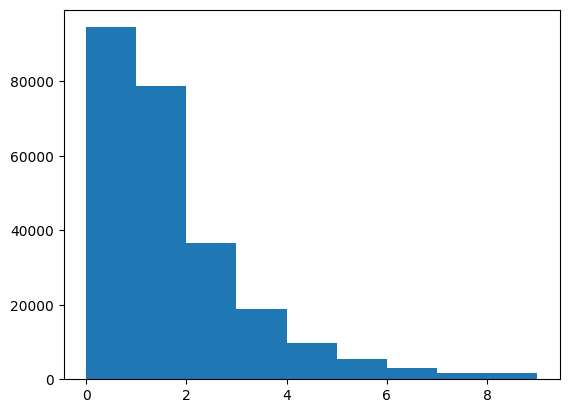

In [48]:
plt.hist(ti_long.nodes_num_mutations[contains_gaps], bins=range(10));

In [49]:
np.mean(ti_long.nodes_num_mutations[contains_ambiguous])

1.4248958261162195

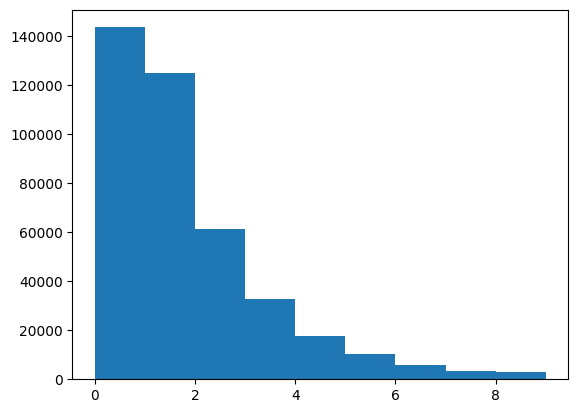

In [50]:
plt.hist(ti_long.nodes_num_mutations[contains_ambiguous], bins=range(10));